In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import math

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score

%matplotlib inline

In [2]:
df_raw = pd.read_csv('../Datasets/Melbourne_housing_FULL.csv')
df_raw.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


The first thing I want to address is the Bathroom and Bathroom2 columns. According to the source of the data (Kaggle.com) Bathroom2 was scraped from a different source. Let's inspect the two columns so we can decide if we want to keep/delete one or merge them together.

In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31420 entries, 0 to 31419
Data columns (total 21 columns):
Suburb           31420 non-null object
Address          31420 non-null object
Rooms            31420 non-null int64
Type             31420 non-null object
Price            24589 non-null float64
Method           31420 non-null object
SellerG          31420 non-null object
Date             31420 non-null object
Distance         31419 non-null float64
Postcode         31419 non-null float64
Bedroom2         24211 non-null float64
Bathroom         24205 non-null float64
Car              23821 non-null float64
Landsize         20621 non-null float64
BuildingArea     12569 non-null float64
YearBuilt        14294 non-null float64
CouncilArea      31417 non-null object
Lattitude        24434 non-null float64
Longtitude       24434 non-null float64
Regionname       31417 non-null object
Propertycount    31417 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.0+ M

In [4]:
# Print out all object dtype columns with their names and unique value counts
print('Number of rows in dataset: ', len(df_raw), '\n\n')
for column in df_raw.columns:
    if df_raw.loc[:, column].dtype == 'object':
        print(column, ':', len(df_raw.loc[:, column].value_counts()))

Number of rows in dataset:  31420 


Suburb : 348
Address : 30718
Type : 3
Method : 9
SellerG : 374
Date : 73
CouncilArea : 33
Regionname : 8


In [5]:
# According to my mentor, a great way to do some feature selection is to use a random forest on all varaibles,
# and then use the variable_importance attribute to see which ones are used most often (read: most useful)
df_features = pd.get_dummies(df_raw.drop(['Address', 'SellerG'], axis=1).copy().dropna())
X = df_features.drop(['Price'], axis=1)
y = df_features.Price.copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [49]:
# These will be the params we will use in our randomized search for the RandomForestRegressor.
params_rf = {'n_estimators': np.random.randint(100, 1000, 100), 'max_depth': np.random.randint(2, 10, 100)}

# Initialize our RandomForestRegressor with only parameters we want to set and keep constant.
# In this case, there are no such parameters, because I don't know what is good to use.
rfr = RandomForestRegressor()

# Initialize RandomizedSearchCV using RandomForestRegressor as the estimator, and
# params_rf as the param_distributions argument.
rscv_rand_forest = RandomizedSearchCV(estimator=rfr, n_iter = 9, n_jobs = -1, param_distributions=params_rf)
rscv_rand_forest.fit(X_train, y_train)
y_pred = rscv_rand_forest.predict(X_test)

df_results_rf = pd.DataFrame(rscv_rand_forest.cv_results_)

C:\toolkits.win\anaconda3-4.4.0\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\toolkits.win\anaconda3-4.4.0\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\toolkits.win\anaconda3-4.4.0\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\toolkits.win\anaconda3-4.4.0\lib\

{'mean_fit_time': array([ 14.84175976, 103.04745166, 130.74756392,  31.12162232,
         82.41241948,  40.02242001,  57.43200191,  30.38129807,
         91.55935073]),
 'mean_score_time': array([0.1425186 , 0.50990009, 0.59140952, 0.12968429, 0.41421994,
        0.24369828, 0.23603026, 0.17218979, 0.35704724]),
 'mean_test_score': array([0.51227228, 0.79912744, 0.79873334, 0.73473298, 0.80685125,
        0.7978446 , 0.68594562, 0.80696848, 0.80847722]),
 'mean_train_score': array([0.51872277, 0.90787609, 0.90756228, 0.79167069, 0.92800135,
        0.9076136 , 0.72637539, 0.92754229, 0.92813109]),
 'param_max_depth': masked_array(data=[2, 8, 8, 5, 9, 8, 4, 9, 9],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[415, 781, 953, 330, 556, 302, 741, 196, 711],
              mask=[False, False, False, False, False, False, False, False,
        

In [79]:
df_results_rf.columns

Index(['mean_fit_time', 'mean_score_time', 'mean_test_score',
       'mean_train_score', 'param_max_depth', 'param_n_estimators', 'params',
       'rank_test_score', 'split0_test_score', 'split0_train_score',
       'split1_test_score', 'split1_train_score', 'split2_test_score',
       'split2_train_score', 'std_fit_time', 'std_score_time',
       'std_test_score', 'std_train_score'],
      dtype='object')

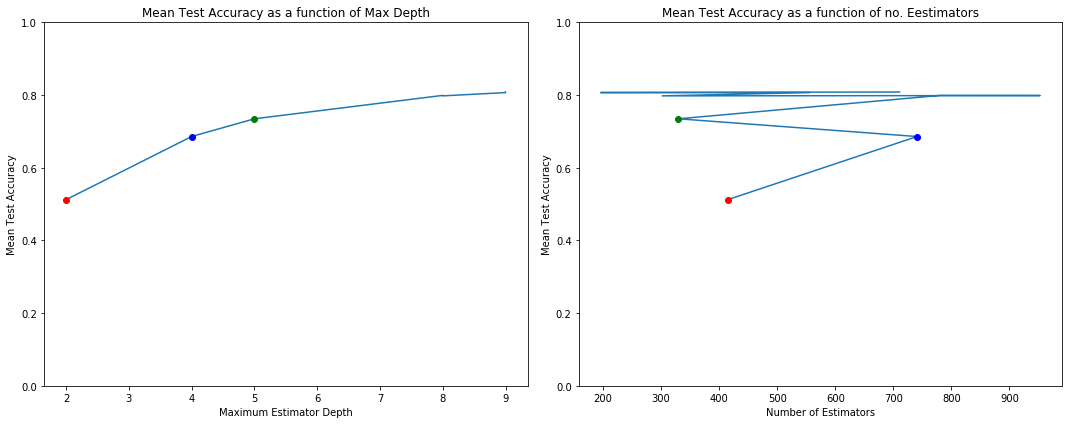

In [113]:
colors = ['r', 'b', 'g']

fig = plt.figure(figsize=(15,6))
plt.subplot(121)
plt.title('Mean Test Accuracy as a function of Max Depth')
plt.xlabel('Maximum Estimator Depth')
plt.ylabel('Mean Test Accuracy')
plt.ylim([0, 1])
plt.plot('param_max_depth', 'mean_test_score', data=df_results_rf.sort_values(by='param_max_depth').copy())
for i in range(3):
    plt.plot(df_results_rf.sort_values(by='param_max_depth').copy().iloc[i, 4],
            df_results_rf.sort_values(by='param_max_depth').copy().iloc[i, 2],
            color=colors[i], 
             marker='o')

plt.subplot(122)
plt.title('Mean Test Accuracy as a function of no. Eestimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Test Accuracy')
plt.ylim([0, 1])
plt.plot('param_n_estimators', 'mean_test_score', data=df_results_rf.sort_values(by='param_max_depth').copy())
for i in range(3):
    plt.plot(df_results_rf.sort_values(by='param_max_depth').copy().iloc[i, 5],
            df_results_rf.sort_values(by='param_max_depth').copy().iloc[i, 2],
            color=colors[i], 
             marker='o')

plt.tight_layout()
plt.show()

Yes, the graph on the right is very strange at first glance. However, since each point is graphed in the same order as the graph on the left, it tells us that our accuracy was increasing regardless of how many estimators we used. I'm not sure if I have described correctly, so I added a red point at the first point, a blue point at the second point, and a green at the third point.

In this way, you can see that as we increase the max_depth, our accuracy increases. The number of estimators does not seem to help much. So, when we try our best estimator again, we should use a small n_estimators like 300. I will also set a high max_depth.

In [134]:
# Create a new estimator from the best params
rf_best = rscv_rand_forest.best_estimator_

# Change some params, mentioned above
rf_best.set_params(n_jobs=-1, n_estimators=300, max_depth=20)

# Show our new parameters for our Random Forest Regressor
for key in rf_best.get_params():
    print(key, ':', rf_best.get_params()[key])

# Fit, predict, and score
rf_best.fit(X_train, y_train)
y_pred = rf_best.predict(X_test)
print(r2_score(y_test, y_pred))

# Save the important features
important_features = rf_best.feature_importances_

bootstrap : True
criterion : mse
max_depth : 20
max_features : auto
max_leaf_nodes : None
min_impurity_decrease : 0.0
min_impurity_split : None
min_samples_leaf : 1
min_samples_split : 2
min_weight_fraction_leaf : 0.0
n_estimators : 300
n_jobs : -1
oob_score : False
random_state : None
verbose : 0
warm_start : False
0.7484165133834726


Great, now that we have an ok classifier for housing prices, let's use the important features it found. I will do the feature downselection inside of a function so we can call it multiple times in a loop, if needed.

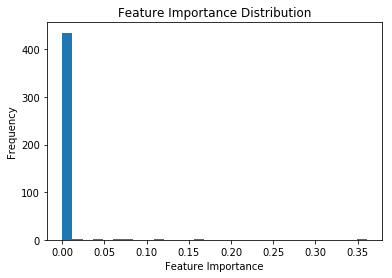

In [143]:
# Most of the features have very little importance
plt.title('Feature Importance Distribution')
plt.xlabel('Feature Importance')
plt.ylabel('Frequency')
plt.hist(important_features, bins=30)
plt.show()

In [ ]:
important_features = rf_best.feature_importances_

def select_important(important_features, fraction_keep):
    number_keep = math.ceil(len(important_features) * fraction_keep)
    important_indices = np.argpartition(important_features, -number_keep)[-number_keep:]
    return important_indices


important_indices = select_important(important_features, 0.1)

# Create new X variables to train and test on
X_train_new, X_test_new = X_train.iloc[:, important_indices].copy(), X_test.iloc[:, important_indices].copy()

Plan: Try Lasso, Ridge and Linear SVM regression on unaltered and altered datasets. Then, if the results still aren't great, try  SVM with RBF Kernel and Gradient Boosting Regressors.

Edit: I ended up not testing Linear SVM on unaltered dataset. The altered dataset took a pretty long time to run with only 

# Lasso Regression with unfiltered features

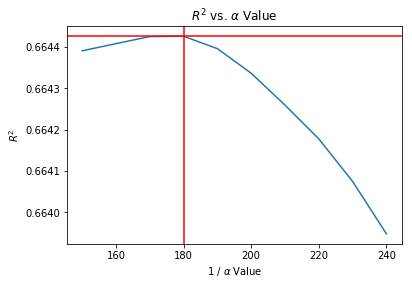

Best value of R^2: 0.664


In [171]:
r2_scores = []
best_i = None

i_start, i_stop, i_step = 150, 250, 10
for i in range(i_start, i_stop, i_step):
    lass = Lasso(alpha=i, copy_X=True, precompute=True, fit_intercept=True, max_iter=10000)
    lass.fit(X_train, y_train)
    y_pred = lass.predict(X_test)
    r2_scores.append(r2_score(y_test, y_pred))

best_i = range(i_start, i_stop, i_step)[np.argmax(r2_scores)]
best_r2 = max(r2_scores)

plt.plot(range(i_start, i_stop, i_step), r2_scores)
plt.axvline(best_i, color='red')
plt.axhline(best_r2, color='red')
plt.title(r'$R^2$ vs. $\alpha$ Value')
plt.xlabel(r'1 / $\alpha$ Value')
plt.ylabel('$R^2$')
plt.show()

print(r'Best value of R^2: {:.3f}'.format(best_r2))

# Lasso Regression with Important Features

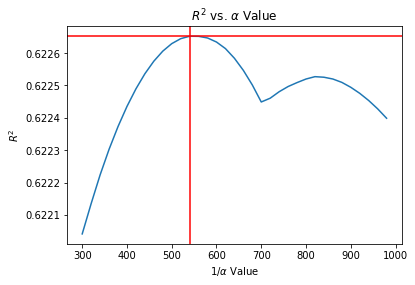

Best value of R^2: 0.623


In [170]:
r2_scores = []
best_i = None

i_start, i_stop, i_step = 300, 1000, 20
for i in range(i_start, i_stop, i_step):
    lass = Lasso(alpha=i, copy_X=True, precompute=True, fit_intercept=True, max_iter=10000)
    lass.fit(X_train_new, y_train)
    y_pred = lass.predict(X_test_new)
    r2_scores.append(r2_score(y_test, y_pred))

best_i = range(i_start, i_stop, i_step)[np.argmax(r2_scores)]
best_r2 = max(r2_scores)

plt.plot(range(i_start, i_stop, i_step), r2_scores)
plt.axvline(best_i, color='red')
plt.axhline(best_r2, color='red')
plt.title(r'$R^2$ vs. $\alpha$ Value')
plt.xlabel(r'$1 / \alpha$ Value')
plt.ylabel('$R^2$')
plt.show()

print(r'Best value of R^2: {:.3f}'.format(best_r2))

The raw data regression did slightly better, and I think that is due to the fact that lasso regression is able to select it's own features with L1 regularization. However, I was able to run many more iterations with the filtered features in a much faster time.

# Ridge Regression with Unfiltered Features

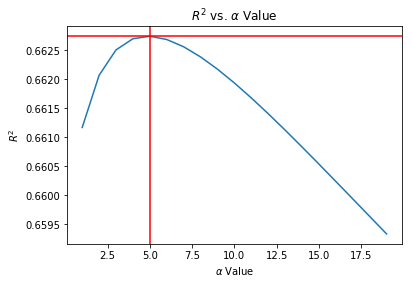

Best value of R^2: 0.663


In [160]:
r2_scores = []
best_i = None

i_start, i_stop, i_step = 1, 20, 1
for i in range(1, 20):
    ridg = Ridge(alpha=i, copy_X=True, solver='auto', fit_intercept=True, max_iter=10000)
    ridg.fit(X_train, y_train)
    y_pred = ridg.predict(X_test)
    r2_scores.append(r2_score(y_test, y_pred))
    
best_i = range(i_start, i_stop, i_step)[np.argmax(r2_scores)]
best_r2 = max(r2_scores)

plt.plot(range(i_start, i_stop, i_step), r2_scores)
plt.axvline(best_i, color='red')
plt.axhline(best_r2, color='red')
plt.title(r'$R^2$ vs. $\alpha$ Value')
plt.xlabel(r'$\alpha$ Value')
plt.ylabel('$R^2$')
plt.show()

print(r'Best value of R^2: {:.3f}'.format(best_r2))

# Ridge Regression with Important Features

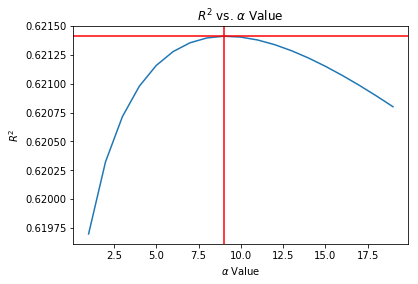

Best value of R^2: 0.621


In [161]:
r2_scores = []
best_i = None

i_start, i_stop, i_step = 1, 20, 1
for i in range(1, 20):
    ridg = Ridge(alpha=i, copy_X=True, solver='auto', fit_intercept=True, max_iter=10000)
    ridg.fit(X_train_new, y_train)
    y_pred = ridg.predict(X_test_new)
    r2_scores.append(r2_score(y_test, y_pred))

best_i = range(i_start, i_stop, i_step)[np.argmax(r2_scores)]
best_r2 = max(r2_scores)

plt.plot(range(i_start, i_stop, i_step), r2_scores)
plt.axvline(best_i, color='red')
plt.axhline(best_r2, color='red')
plt.title(r'$R^2$ vs. $\alpha$ Value')
plt.xlabel(r'$\alpha$ Value')
plt.ylabel('$R^2$')
plt.show()

print(r'Best value of R^2: {:.3f}'.format(best_r2))

Again, I was able to run a lot more iterations much more quickly with the filtered dataset. However, neither lasso or ridge was close to the random forest we first tried to use. I think it's time to try some more powerful algorithms. Let's start with Linear SVM, then move on to the RBF Kernel for SVM. I also want to try to see if there is an algo to find the best kernel!

# Linear SVC with Important Features

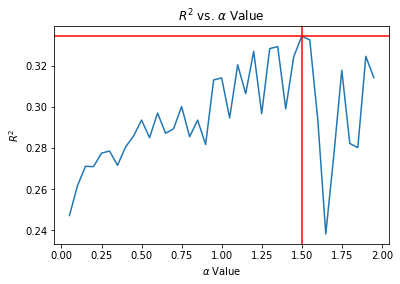

Best value of R^2: 0.334


In [189]:
r2_scores = []
best_i = None

i_start, i_stop, i_step = .05, 2, .05
for i in np.arange(i_start, i_stop, i_step):
    lin_svr = LinearSVR(C=i)
    lin_svr.fit(X_train_new, y_train)
    y_pred = lin_svr.predict(X_test_new)
    r2_scores.append(r2_score(y_test, y_pred))

best_i = np.arange(i_start, i_stop, i_step)[np.argmax(r2_scores)]
best_r2 = max(r2_scores)

plt.plot(np.arange(i_start, i_stop, i_step), r2_scores)
plt.axvline(best_i, color='red')
plt.axhline(best_r2, color='red')
plt.title(r'$R^2$ vs. $\alpha$ Value')
plt.xlabel(r'$\alpha$ Value')
plt.ylabel('$R^2$')
plt.show()

print(r'Best value of R^2: {:.3f}'.format(best_r2))

That is what I would call abysmal... Let's try an RBF Kernel

# RBF Kernel SVM Regressor with Important Features

0.0005
0.0015
0.0025
0.0035
0.0045000000000000005


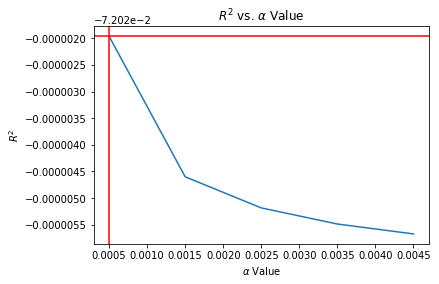

Best value of R^2: -0.072


In [222]:
r2_scores = []
best_i = None

i_start, i_stop, i_step = .0005, 0.005, .001
for i in np.arange(i_start, i_stop, i_step):
    rbf_svr = SVR(gamma=i, kernel='rbf')
    rbf_svr.fit(X_train_new, y_train)
    y_pred = rbf_svr.predict(X_test_new)
    r2_scores.append(r2_score(y_test, y_pred))
    print(i)

best_i = np.arange(i_start, i_stop, i_step)[np.argmax(r2_scores)]
best_r2 = max(r2_scores)

plt.plot(np.arange(i_start, i_stop, i_step), r2_scores)
plt.axvline(best_i, color='red')
plt.axhline(best_r2, color='red')
plt.title(r'$R^2$ vs. $\alpha$ Value')
plt.xlabel(r'$\alpha$ Value')
plt.ylabel('$R^2$')
plt.show()

print(r'Best value of R^2: {:.3f}'.format(best_r2))

I've tried a bunch of different values for gamma and C for an rbf kernel. They all kinda suck. Let's just use a Gradient Boosing Regressor, and call it a day.

# Gradient Boosting Regressor with Important Features

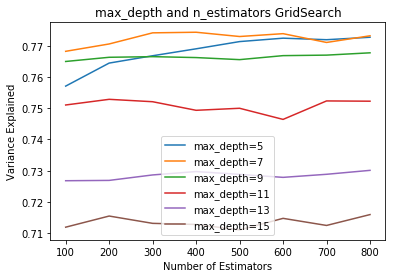

In [221]:
r2_scores = {}
best_i = {}

i_start, i_stop, i_step = 5, 17, 2
j_start, j_stop, j_step = 100, 900, 100
for i in range(i_start, i_stop, i_step):
    r2_scores[i] = []
    for j in range(j_start, j_stop, j_step):
        gbr = GradientBoostingRegressor(n_estimators=j, max_depth=i)
        gbr.fit(X_train_new, y_train)
        y_pred = gbr.predict(X_test_new)
        r2_scores.setdefault(i, []).append(r2_score(y_test, y_pred))
    plt.plot(range(j_start, j_stop, j_step), r2_scores[i], label='max_depth=' + str(i))

plt.title('max_depth and n_estimators GridSearch')
plt.xlabel('Number of Estimators')
plt.ylabel('Variance Explained')
plt.legend()
plt.show()

I wasn't planning on doing any more for this, but I can see that it's a pretty close race between the 5, 7, and 9 lines. Let's up our n_estimator range just a little bit more and see where that takes us! I want to keep the above results, so I will just copy and paste the whole cell. I really need to start making my own functions!

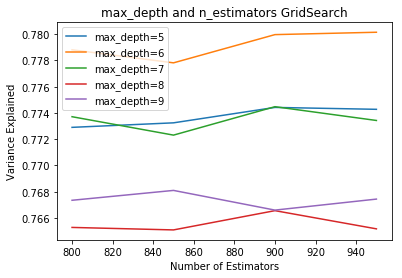

In [224]:
r2_scores = {}
best_i = {}

i_start, i_stop, i_step = 5, 10, 1
j_start, j_stop, j_step = 800, 1000, 50
for i in range(i_start, i_stop, i_step):
    
    # Make a new entry in the r2_scores dict pertaining to a fixed max_depth, equal to 'i'
    r2_scores[i] = []
    
    # Loop through each value of n_estimators and append it to max_depth list we are working on
    for j in range(j_start, j_stop, j_step):
        gbr = GradientBoostingRegressor(n_estimators=j, max_depth=i)
        gbr.fit(X_train_new, y_train)
        y_pred = gbr.predict(X_test_new)
        r2_scores.setdefault(i, []).append(r2_score(y_test, y_pred))
    
    
    plt.plot(range(j_start, j_stop, j_step), r2_scores[i], label='max_depth=' + str(i))

plt.title('max_depth and n_estimators GridSearch')
plt.xlabel('Number of Estimators')
plt.ylabel('Variance Explained')
plt.legend()
plt.show()

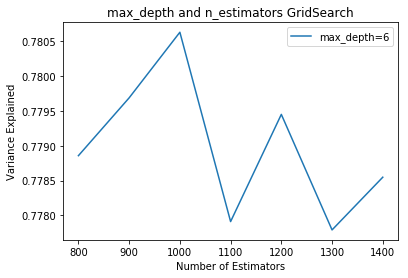

In [226]:
r2_scores = {}
best_i = {}

i_start, i_stop, i_step = 6, 7, 2
j_start, j_stop, j_step = 800, 1500, 100
for i in range(i_start, i_stop, i_step):
    
    # Make a new entry in the r2_scores dict pertaining to a fixed max_depth, equal to 'i'
    r2_scores[i] = []
    
    # Loop through each value of n_estimators and append it to max_depth list we are working on
    for j in range(j_start, j_stop, j_step):
        gbr = GradientBoostingRegressor(n_estimators=j, max_depth=i)
        gbr.fit(X_train_new, y_train)
        y_pred = gbr.predict(X_test_new)
        r2_scores.setdefault(i, []).append(r2_score(y_test, y_pred))
    
    
    plt.plot(range(j_start, j_stop, j_step), r2_scores[i], label='max_depth=' + str(i))

plt.title('max_depth and n_estimators GridSearch')
plt.xlabel('Number of Estimators')
plt.ylabel('Variance Explained')
plt.legend()
plt.show()